## Table of content


<p dir="ltr">1- Importing libraries</p>
<p dir="ltr">2- Data Pre-processing&nbsp;</p>
<p dir="ltr">4- Data splitting into train and test</p>

<p dir="ltr">5- Model training and Model Evaluation</p>
<p dir="ltr"></p>
<ol>
    <li>KNN</li>
    <li>Logistic regression</li>
    <li>Neural Network</li>
    <li>SVM</li>
    <li>GaussianNB</li>
</ol>
<p></p>
<p>6- Model Comparison&nbsp;</p>
<p></p>

## Connect to google drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries


In [12]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from datetime import datetime

## Data Preprocessing

In [13]:
# Read dataset
# Change your dataset path
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DDos_ML/DDos_and_Normal_Traffic_Dataset.csv")

In [14]:
df.head(-10)

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,avg_packet_size,flow_duration_total,idle_mean,idle_std,idle_max,idle_min,label
0,1.719371e+09,1,192.168.0.15050192.168.1.4532686,192.168.0.1,5050,192.168.1.4,53268,6,-1,-1,...,8.863929e-05,2.635596e+06,5.850380e-03,66.002104,2.901,0.000000,0.000000,0.000000,0.000000,0
1,1.719371e+09,1,192.168.1.453268192.168.0.150506,192.168.1.4,53268,192.168.0.1,5050,6,-1,-1,...,1.384392e-04,3.108656e+09,6.877558e+00,49679.278252,2.904,0.000000,0.000000,0.000000,0.000000,0
2,1.719371e+09,2,192.168.0.15050192.168.1.4532686,192.168.0.1,5050,192.168.1.4,53268,6,-1,-1,...,9.024181e-05,2.635596e+06,5.956149e-03,66.002104,2.885,0.000815,0.000000,0.000815,0.000815,0
3,1.719371e+09,2,192.168.1.453268192.168.0.150506,192.168.1.4,53268,192.168.0.1,5050,6,-1,-1,...,1.372259e-04,3.108656e+09,6.817228e+00,49678.882078,2.912,0.000815,0.000000,0.000815,0.000815,0
4,1.719371e+09,2,192.168.1.40192.168.1.501,192.168.1.4,0,192.168.1.5,0,1,0,8,...,2.202643e-09,9.800000e+01,2.158590e-07,98.000000,2.908,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436682,1.720088e+09,1,192.168.1.40192.168.0.201,192.168.1.4,0,192.168.0.2,0,1,0,8,...,1.485884e-09,1.225000e+01,1.456166e-07,98.000000,8.673,24.139247,142.927803,2861.701284,0.000000,0
436683,1.720088e+09,2,192.168.0.15050192.168.1.4460906,192.168.0.1,5050,192.168.1.4,46090,6,-1,-1,...,2.747339e-04,1.645056e+06,1.813448e-02,66.007429,7.635,0.001524,0.000000,0.001524,0.001524,0
436684,1.720088e+09,2,192.168.0.20192.168.1.401,192.168.0.2,0,192.168.1.4,0,1,0,0,...,2.989537e-09,2.450000e+01,2.929746e-07,98.000000,8.669,24.119348,142.870556,2861.701284,0.000000,0
436685,1.720088e+09,2,192.168.1.446090192.168.0.150506,192.168.1.4,46090,192.168.0.1,5050,6,-1,-1,...,5.710448e-04,2.868022e+09,2.996441e+01,52472.963157,7.670,0.001524,0.000000,0.001524,0.001524,0


In [15]:
#Unique values in the Label target column
df.loc[:,'label'].unique()
# Replace dots in IP addresses to convert to numerical representation
df['flow_id'] = df['flow_id'].str.replace('.', '')
df['ip_src'] = df['ip_src'].str.replace('.', '')
df['ip_dst'] = df['ip_dst'].str.replace('.', '')

In [16]:
# Count missing value for each feature
print(df.isna().sum())

timestamp                   0
datapath_id                 0
flow_id                     0
ip_src                      0
tp_src                      0
ip_dst                      0
tp_dst                      0
ip_proto                    0
icmp_code                   0
icmp_type                   0
flow_duration_sec           0
flow_duration_nsec          0
idle_timeout                0
hard_timeout                0
flags                       0
packet_count                0
byte_count                  0
packet_count_per_second     0
packet_count_per_nsecond    0
byte_count_per_second       0
byte_count_per_nsecond      0
avg_packet_size             0
flow_duration_total         0
idle_mean                   0
idle_std                    0
idle_max                    0
idle_min                    0
label                       0
dtype: int64


## Data splitting into train and test

In [17]:
# Split data into features and target variable
X = df.drop('label', axis=1).values.astype(float)
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardized data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (327522, 27)
The test dataset size =  (109175, 27)


# ----------------------------Training the model--------------------------------

### Model Evaluation

In [18]:
# Function to evaluate model
def evaluate_model(y_true, y_pred, start_time, end_time):
    acc = accuracy_score(y_true, y_pred)
    print("Success accuracy = {0:.2f} %".format(acc*100))
    fail = 1.0 - acc
    print("Fail accuracy = {0:.2f} %".format(fail*100))
    training_time = end_time - start_time
    #hours, rem = divmod(training_time.seconds, 3600)
    #minutes, seconds = divmod(rem, 60)
    print(f"Training time: {training_time}")
    return acc, fail, training_time

# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


### Traning model

Evaluate KNN Model
Success accuracy = 99.76 %
Fail accuracy = 0.24 %
Training time: 0:03:59.513032


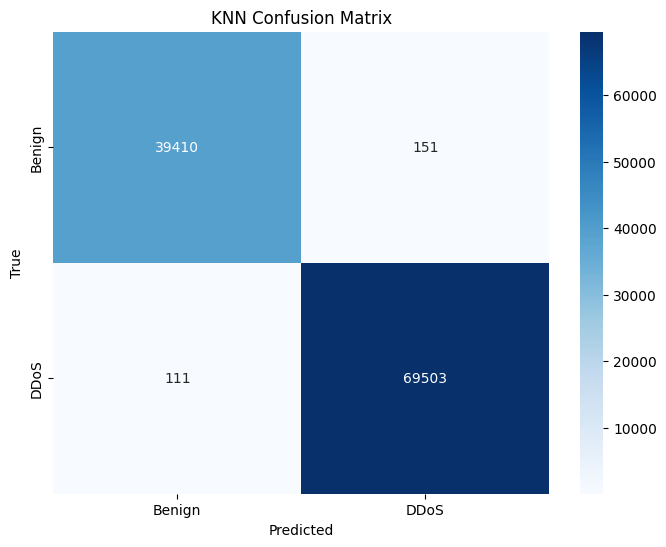

Evaluate Logistic Regression Model
Success accuracy = 99.18 %
Fail accuracy = 0.82 %
Training time: 0:00:15.335198


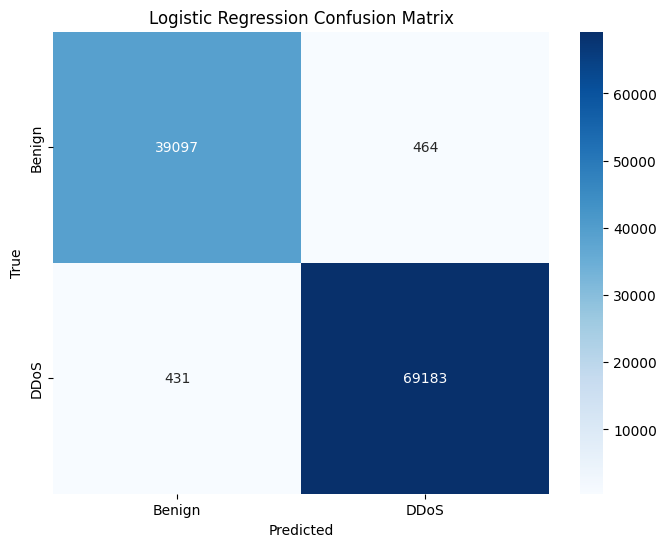

Evaluate Neural Network Model


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Success accuracy = 98.98 %
Fail accuracy = 1.02 %
Training time: 0:00:13.035525


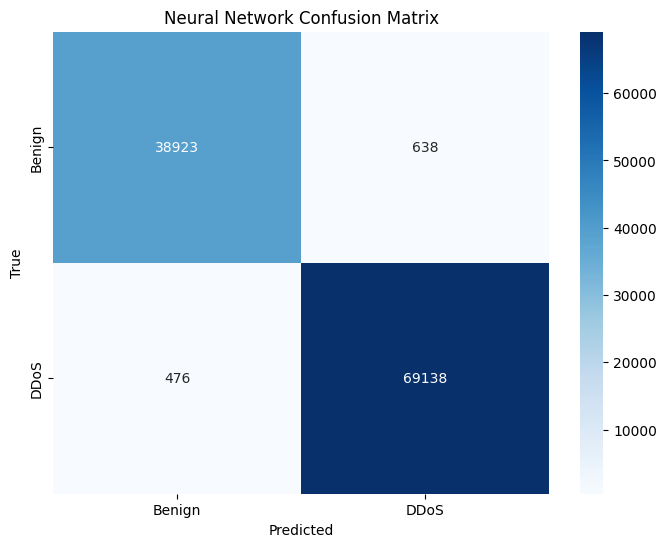

Evaluate SVM Model


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Success accuracy = 91.39 %
Fail accuracy = 8.61 %
Training time: 0:01:20.116338


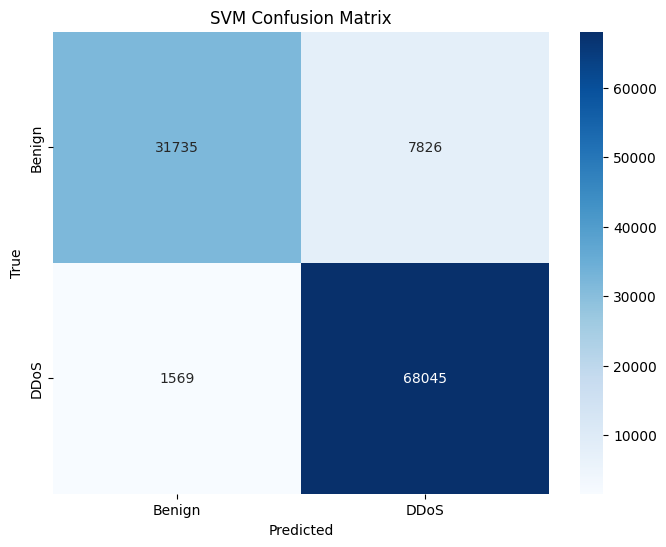

Evaluate GaussianNB Model
Success accuracy = 97.61 %
Fail accuracy = 2.39 %
Training time: 0:00:00.258435


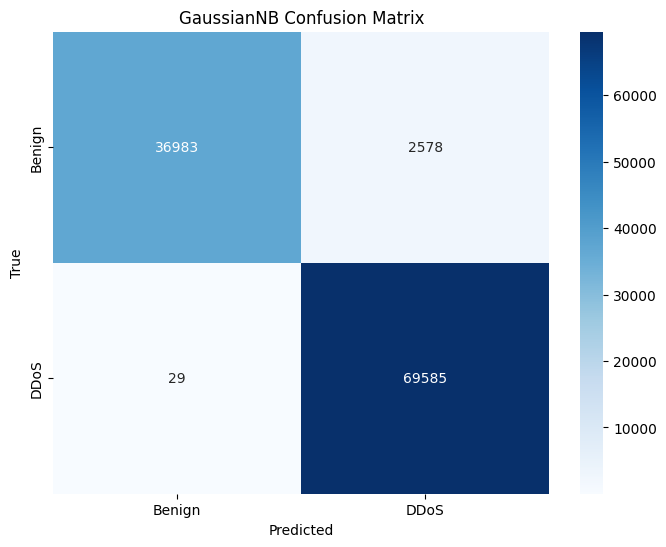

In [19]:
# Evaluate different models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(5,), max_iter=20, random_state=42, solver='sgd'),
    #'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5),  # Overfitting
    #'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5),  # Overfitting
    'SVM': SVC(max_iter=1000),
    'GaussianNB': GaussianNB()
}

results = []

for model_name, model in models.items():
    print(f"Evaluate {model_name} Model")
    start_time = datetime.now()
    try:
        model.fit(X_train, y_train)
    except Exception as e:
        print(f"Error while fitting {model_name}: {e}")
        continue
    y_pred = model.predict(X_test)
    end_time = datetime.now()
    acc, fail, training_time = evaluate_model(y_test, y_pred, start_time, end_time)
    results.append({
        'Model': model_name,
        'Success Accuracy': acc*100,
        'Fail Accuracy': fail*100,
        'Training Time': training_time.total_seconds()
    })
    plot_confusion_matrix(y_test, y_pred, ['Benign', 'DDoS'], f'{model_name} Confusion Matrix')

## Model Comparison

                 Model  Success Accuracy  Fail Accuracy  Training Time
0                  KNN         99.760018       0.239982     239.513032
1  Logistic Regression         99.180215       0.819785      15.335198
2       Neural Network         98.979620       1.020380      13.035525
3                  SVM         91.394550       8.605450      80.116338
4           GaussianNB         97.612091       2.387909       0.258435


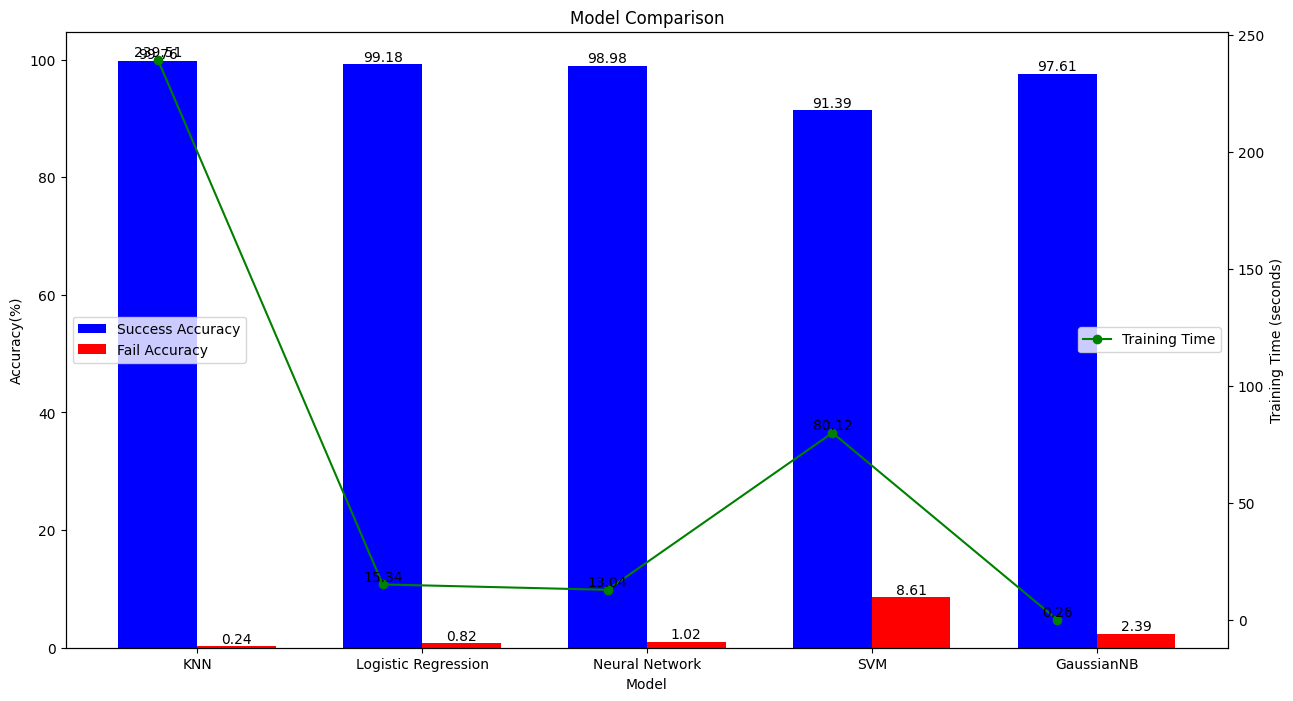

In [20]:
def compare_models(results):
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Plotting the results
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Bar plot for Success Accuracy and Fail Accuracy
    bar_width = 0.35
    index = np.arange(len(results_df['Model']))
    bar1 = ax1.bar(index, results_df['Success Accuracy'], bar_width, label='Success Accuracy', color='blue')
    bar2 = ax1.bar(index + bar_width, results_df['Fail Accuracy'], bar_width, label='Fail Accuracy', color='red')

    ax1.set_xlabel('Model')
    ax1.set_ylabel('Accuracy(%)')
    ax1.set_title('Model Comparison')
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(results_df['Model'])
    ax1.legend()

    # Adding labels on bars
    for rect in bar1 + bar2:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    ax1.legend(loc='center left')
    # Line plot for Training Time
    ax2 = ax1.twinx()
    ax2.set_ylabel('Training Time (seconds)')
    line = ax2.plot(results_df['Model'], results_df['Training Time'], color='green', marker='o', label='Training Time')

    # Adding labels on line plot
    for x, y in zip(index, results_df['Training Time']):
        ax2.text(x, y, f'{y:.2f}', ha='center', va='bottom')

    ax2.legend(loc='center right')

    plt.show()

results_df = pd.DataFrame(results)
print(results_df)
compare_models(results)